# Cartoon characters

Each section represents a stage along implementing an image classifier from loading and inspecting the dataset to making something working. The section descriptions contain what to do / sould do in that step.

**Note** Make sure the notebook is using GPU acceleration in Edit -> Notebook settings, otherwise training and evaluation can be very slow.

## Task description
Implement a deep learning classifier of characters from the Simpsons TV show with Keras. The dataset has been preprocessed, each image having the same resolution.


## Dataset preparations
First download the data and extract it:

In [ ]:
# Downloading the dataset
!curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id=1QelVmKZNBwcLEwptawOKE76pTBvRGoA3" > /dev/null
!curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm=`awk '/download/ {print $NF}' ./cookie`&id=1QelVmKZNBwcLEwptawOKE76pTBvRGoA3" -o simpsons_dataset_train.pkl

!curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id=1wAYMLNO2xYJbK_p6z0KAaxea2jw2mkdA" > /dev/null
!curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm=`awk '/download/ {print $NF}' ./cookie`&id=1wAYMLNO2xYJbK_p6z0KAaxea2jw2mkdA" -o simpsons_dataset_test.pkl

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0   4250      0 --:--:-- --:--:-- --:--:--  4250
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  129M    0  129M    0     0  79.9M      0 --:--:--  0:00:01 --:--:--  118M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0    198      0 --:--:--  0:00:02 --:--:--   198
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
100 32.4M    0 32.4M    0     0  13.8M      0 --:--:--  0:00:02 --:--:-- 13.8M


This downloads two Python pickle files, one for the training (`simpsons_dataset_train.pkl`) and one for the test set (`simpsons_dataset_test.pkl`). Both files contain a dictionary, the key `features` holds the images, the key `labels` the label ids. You can inspect the downloaded files in the sidebar on the left, under the *Files* tab.  The following code loads the dataset:

In [ ]:
import pickle
with open('simpsons_dataset_test.pkl', 'rb') as f:
    test = pickle.load(f)
with open('simpsons_dataset_train.pkl', 'rb') as f:
    train = pickle.load(f)
    
x_test, y_test = test['features'], test['labels']
x_train, y_train = train['features'], train['labels']

In [ ]:
print(f"Training Data: {x_train.shape}  {y_train.shape}")
print(f"Testing Data:  {x_test.shape}   {y_test.shape}")

Training Data: (11044, 64, 64, 3)  (11044,)
Testing Data:  (2767, 64, 64, 3)   (2767,)


Notice that the original dataset does not define a validation set, you have to split it yourself. Split the training set into a training and validation set. Make sure in the validation set the classes have a similar distribution to the training set.

In [ ]:
# ADD YOUR CODE HERE
# It should create the variables x_train, y_train, x_valid, y_valid
# The training and validation set must be disjoint

from sklearn.model_selection import train_test_split

X = x_train.copy()
y = y_train.copy()

# Setting the stratify=y ensures the similar distribution of classes
x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, stratify=y)

print(f'Training   {x_train.shape}\t{y_train.shape}')
print(f'Validation {x_valid.shape}\t{y_valid.shape}')
print(f'Testing    {x_test.shape}\t{y_test.shape}')

Training   (8835, 64, 64, 3)	(8835,)
Validation (2209, 64, 64, 3)	(2209,)
Testing    (2767, 64, 64, 3)	(2767,)


Now that you have set up the dataset, it's time to look at some of the images. Create a function that randomly selects 4 images from a class and shows them.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def draw_images(imgs, labels, class_to_draw):
    """
    imgs - a numpy array of size Nx64x64x3 where N is the number of images. imgs contains the 64x64 pixel images
    labels - array of length N, the class id of the images
    class_to_draw - id of the class from which to select images
    """
    # IMPLEMENT YOUR CODE HERE

    indices = np.where(labels == class_to_draw)
    indexes = list(np.random.choice(len(indices[0]), 4, replace=False))

    fig = plt.figure(figsize=(12, 7))
    for i in range(len(indexes)):
        fig.add_subplot(2, 2, i+1)
        plt.imshow(imgs[indexes[i]])
        plt.axis('off')

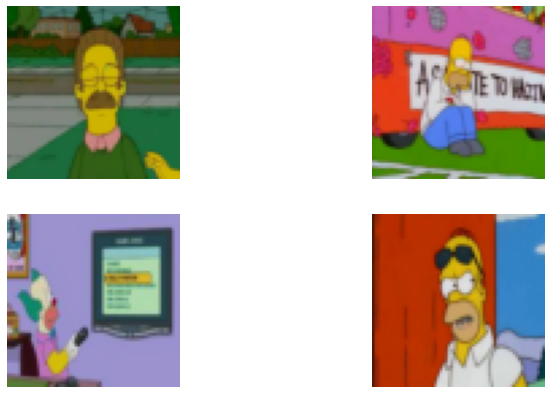

In [ ]:
# Show some images from class #2
draw_images(x_train, y_train, 2)

First, you should normalize the data. Apply a normalisation method of your choice that brings the data around 0, to the scale of 0-1.

Note: you may want to convert the datatype of `x_train` and `x_test` to float32 instead of the original uint8. Fractional values are not representable with a `uint8` datatype.

In [ ]:
# ADD YOUR CODE HERE
# IT SHOULD MODIFY x_train, and x_test the same way

print('Training')
print(f'DataType: {x_train.dtype}')
print(f'Minimum value: {x_train.min()}\tMaximum value: {x_train.max()}')

print('\nValidation')
print(f'DataType: {x_valid.dtype}')
print(f'Minimum value: {x_valid.min()}\tMaximum value: {x_valid.max()}')

print('\nTesting Data')
print(f'DataType: {x_test.dtype}')
print(f'Minimum value: {x_test.min()}\tMaximum value: {x_test.max()}')

print("\nAfter Normalizing")

x_train = x_train.astype('float32')
x_train /= 255.0
x_valid = x_valid.astype('float32')
x_valid /= 255.0
x_test = x_test.astype('float32')
x_test /= 255.0

print('\nTraining')
print(f'DataType: {x_train.dtype}')
print(f'Minimum value: {x_train.min()}\tMaximum value: {x_train.max()}')

print('\nValidation')
print(f'DataType: {x_valid.dtype}')
print(f'Minimum value: {x_valid.min()}\tMaximum value: {x_valid.max()}')

print('\nTesting Data')
print(f'DataType: {x_test.dtype}')
print(f'Minimum value: {x_test.min()}\tMaximum value: {x_test.max()}')

Training
DataType: uint8
Minimum value: 0	Maximum value: 255

Validation
DataType: uint8
Minimum value: 0	Maximum value: 255

Testing Data
DataType: uint8
Minimum value: 0	Maximum value: 255

After Normalizing

Training
DataType: float32
Minimum value: 0.0	Maximum value: 1.0

Validation
DataType: float32
Minimum value: 0.0	Maximum value: 1.0

Testing Data
DataType: float32
Minimum value: 0.0	Maximum value: 1.0


## Training the network

Implement and train the following modified LeNet architecture. It has the following layers:

- A convolutional layer with 5x5 kernel and 8 filters
- An AveragePooling layer
- A convolutional layer with 3x3 kernel and 16 filters
- An AveragePooling layer
- A fully connected layer of 100 units
- A fully connected layer of 60 units
- A fully connected layer with softmax activation, having the same number of units as classes

All layers have ReLU activations. 

How many parameters does this network have? 
**Total Parameters are: 322,146, as you can see in Model Summary.**

Now train the network for 50 epochs.

In [ ]:
# ADD YOUR CODE HERE

from tensorflow.keras.layers import Conv2D, AveragePooling2D, Dense, Flatten
import tensorflow as tf

model = tf.keras.Sequential([
                          Conv2D(8, (5,5), activation='relu', kernel_initializer='he_uniform', input_shape  = (64, 64, 3)),
                          AveragePooling2D(),
                          Conv2D(16, (3,3), activation='relu', kernel_initializer='he_uniform'),
                          AveragePooling2D(),
                          Flatten(),
                          Dense(100, activation='relu', kernel_initializer='he_uniform'),
                          Dense(60, activation='relu', kernel_initializer='he_uniform'),
                          Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 60, 60, 8)         608       
_________________________________________________________________
average_pooling2d_6 (Average (None, 30, 30, 8)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 16)        1168      
_________________________________________________________________
average_pooling2d_7 (Average (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 100)               313700    
_________________________________________________________________
dense_10 (Dense)             (None, 60)               

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', 
              metrics=['acc'])

In [ ]:
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_valid, y_valid))

Epoch 1/50
277/277 [==============================] - 2s 5ms/step - loss: 2.0751 - acc: 0.2524 - val_loss: 1.5231 - val_acc: 0.4889
Epoch 2/50
277/277 [==============================] - 1s 5ms/step - loss: 1.4351 - acc: 0.5245 - val_loss: 1.2417 - val_acc: 0.6039
Epoch 3/50
277/277 [==============================] - 1s 5ms/step - loss: 1.1027 - acc: 0.6360 - val_loss: 1.1817 - val_acc: 0.6157
Epoch 4/50
277/277 [==============================] - 1s 5ms/step - loss: 0.9135 - acc: 0.7002 - val_loss: 1.1225 - val_acc: 0.6360
Epoch 5/50
277/277 [==============================] - 1s 5ms/step - loss: 0.7494 - acc: 0.7607 - val_loss: 1.0785 - val_acc: 0.6650
Epoch 6/50
277/277 [==============================] - 1s 5ms/step - loss: 0.6253 - acc: 0.7912 - val_loss: 1.0495 - val_acc: 0.6872
Epoch 7/50
277/277 [==============================] - 1s 5ms/step - loss: 0.4999 - acc: 0.8391 - val_loss: 1.0518 - val_acc: 0.6908
Epoch 8/50
277/277 [==============================] - 1s 5ms/step - loss: 0.

Now that the model has finished training, plot the accuracy and loss over time, both for the training and the validation data:

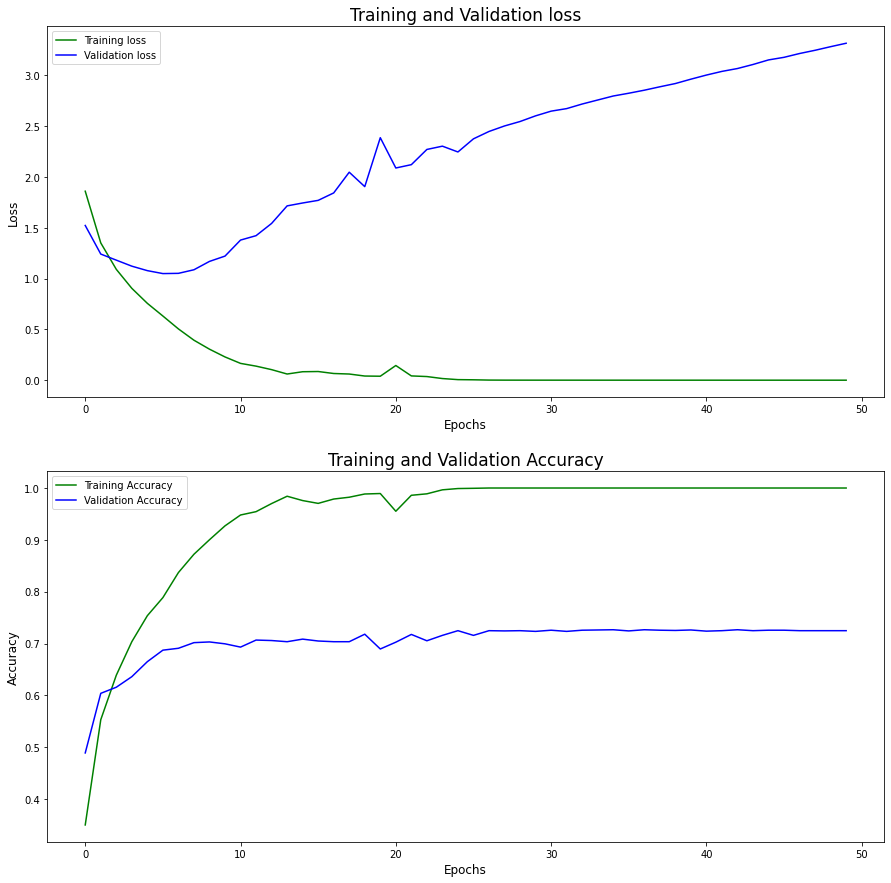

In [ ]:
# ADD YOUR CODE HERE

import matplotlib.pyplot as plt

epochs = list(range(50))

plt.figure(figsize=(15,15))
plt.subplot(2, 1, 1)
plt.plot(epochs, history.history['loss'], 'g', label='Training loss')
plt.plot(epochs, history.history['val_loss'], 'b', label='Validation loss')
plt.xlabel('Epochs', size=12)
plt.ylabel('Loss', size=12)
plt.title('Training and Validation loss', size=17)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, history.history['acc'], 'g', label='Training Accuracy')
plt.plot(epochs, history.history['val_acc'], 'b', label='Validation Accuracy')
plt.xlabel('Epochs', size=12)
plt.ylabel('Accuracy', size=12)
plt.title('Training and Validation Accuracy', size=17)
plt.legend()

plt.show()

How did the loss and accuracy curves change over time? What does it mean regarding the training process (i.e. overfit, underfit, etc.)? Is that a problem and how would you solve it?

**The Loss and Accuracy are Improving with time for Training Data but for Validation Data they are not improving, which means the Model is Overfitting and this is a problem.** 

**We can use Data Augmentation and L2 Regularization to overcome the Overfitting.**

Finally, calculate the performance of your model on the test set:

In [ ]:
# ADD YOUR CODE HERE

loss, acc = model.evaluate(x_test, y_test, verbose=0)
print("Testing \t Loss: {:.3}  Accuracy: {:.3}%".format(loss, acc*100))

Testing 	 Loss: 3.54  Accuracy: 70.6%


## Improving the method

Add augmentations to the model, and retrain the network! Plot the training curves as well.

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
  tf.keras.layers.experimental.preprocessing.RandomZoom(-0.1, -0.1)
])

In [ ]:
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Dense, Flatten
import tensorflow as tf
from tensorflow.keras.regularizers import l2

model = tf.keras.Sequential([
                          tf.keras.Input(shape = [64,64,3]),
                          data_augmentation,
                          Conv2D(8, (5,5), activation='relu', kernel_initializer='he_uniform', kernel_regularizer = l2(0.001)),
                          AveragePooling2D(),
                          Conv2D(16, (3,3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer = l2(0.001)),
                          AveragePooling2D(),
                          Flatten(),
                          Dense(100, activation='relu', kernel_initializer='he_uniform', kernel_regularizer = l2(0.001)),
                          Dense(60, activation='relu', kernel_initializer='he_uniform', kernel_regularizer = l2(0.001)),
                          Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_5 (Sequential)    (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 60, 60, 8)         608       
_________________________________________________________________
average_pooling2d_8 (Average (None, 30, 30, 8)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 16)        1168      
_________________________________________________________________
average_pooling2d_9 (Average (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)              

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', 
              metrics=['acc'])

In [ ]:
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_valid, y_valid))

Epoch 1/50
277/277 [==============================] - 3s 7ms/step - loss: 2.4064 - acc: 0.2187 - val_loss: 1.8573 - val_acc: 0.4355
Epoch 2/50
277/277 [==============================] - 2s 6ms/step - loss: 1.9109 - acc: 0.4096 - val_loss: 1.6563 - val_acc: 0.5007
Epoch 3/50
277/277 [==============================] - 2s 6ms/step - loss: 1.7492 - acc: 0.4573 - val_loss: 1.6364 - val_acc: 0.5084
Epoch 4/50
277/277 [==============================] - 2s 6ms/step - loss: 1.6693 - acc: 0.4862 - val_loss: 1.5300 - val_acc: 0.5450
Epoch 5/50
277/277 [==============================] - 2s 6ms/step - loss: 1.5930 - acc: 0.5169 - val_loss: 1.4548 - val_acc: 0.5736
Epoch 6/50
277/277 [==============================] - 2s 6ms/step - loss: 1.5470 - acc: 0.5400 - val_loss: 1.3920 - val_acc: 0.5853
Epoch 7/50
277/277 [==============================] - 2s 6ms/step - loss: 1.4880 - acc: 0.5590 - val_loss: 1.4174 - val_acc: 0.5944
Epoch 8/50
277/277 [==============================] - 2s 6ms/step - loss: 1.

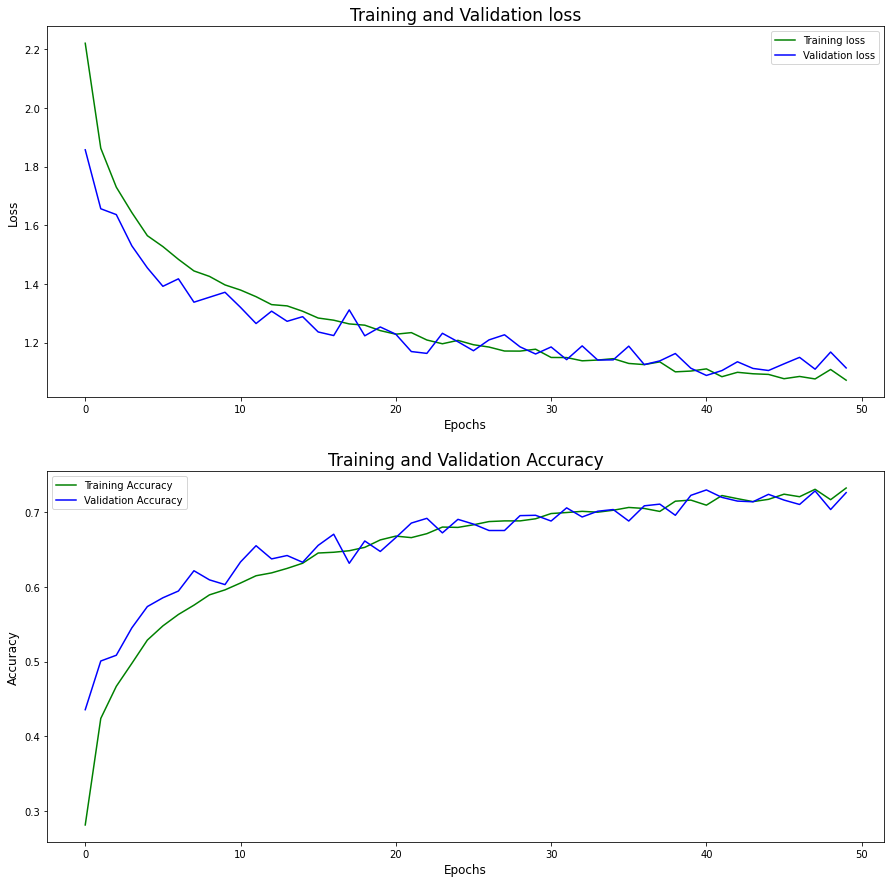

In [ ]:
import matplotlib.pyplot as plt

epochs = list(range(50))

plt.figure(figsize=(15,15))
plt.subplot(2, 1, 1)
plt.plot(epochs, history.history['loss'], 'g', label='Training loss')
plt.plot(epochs, history.history['val_loss'], 'b', label='Validation loss')
plt.xlabel('Epochs', size=12)
plt.ylabel('Loss', size=12)
plt.title('Training and Validation loss', size=17)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, history.history['acc'], 'g', label='Training Accuracy')
plt.plot(epochs, history.history['val_acc'], 'b', label='Validation Accuracy')
plt.xlabel('Epochs', size=12)
plt.ylabel('Accuracy', size=12)
plt.title('Training and Validation Accuracy', size=17)
plt.legend()

plt.show()

In [ ]:
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print("Testing \t Loss: {:.3}  Accuracy: {:.3}%".format(loss, acc*100))

Testing 	 Loss: 1.12  Accuracy: 71.3%


## Conclusions

You have trianed two models (one with augmentations and one without any). Compare their results. Write a couple of sentences which one would you choose and why.

**The first model without any Augmentation is overfitting on a very high scale and the gap between Training and Validation Accuracies and Loss is very high. While The second model with Augmentation is not Overfitting since the Gap between Training and Validation Accuracies and Loss is negligible and the second model is generalizing instead of Overfitting.**

**So we sould use the second model. It is more generalized towards unseen data and can make good predictions for new data, which is what we want from a deep learning model to Generalize on new data.**